sphinx:
  config:
    mathjax_path: https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js

Welcome to the laboratory computers for the course "Neural signals and signal processing". The aim of the laboratories is to provide insights on how to analyze imaging data, e.g., from functional Magnetic Resonance Imaging (fMRI), elecrophysiological neural signals, e.g., from Electroencephalogram (EEG) or neurophysiological signals, e.g., from functional Near Infrared Spectroscopy (fNRIS).

<img src="https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png" style="padding-right:10px;width:140px;float:left"></td>
<h2 style="white-space: nowrap">Neural Signals and Signal Processing (NX-421)</h2>
<hr style="clear:both"></hr>
<h1><font color='black'>Laboratory exercise: Get acquainted with fNIRS data </font></h1>


# 1. Import of libraries



Let's first install the [`%mne`](https://mne.tools/stable/index.html) library which will serve as support for visualization and preprocessing tools for fNIRS data in this lab.

Run the next cell to import the mne library and other related libraries/functions. 

In [2]:
#Import library for analyzing human neurophysiological data 
import mne

Verify that the requirements for mne library are satisfied by running the next cell.

In [3]:
!pip install mne

/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: nest-2.20.1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


For a user-friendly and interactive visualization of the analyzed data and signals, you might need to use the functions of the python-based library [`matplotlib`](https://pypi.org/project/matplotlib/).

Run the next cell to import the matplotlip library and run some of the main functions.

In [3]:
#Import library for static, animated, and interactive visualizations
import matplotlib
#Run next command to configure a display with the graphics library integrated into Notebook
%matplotlib inline
#Run next command to make nteractive plots and simple cases of programmatic plot
import matplotlib.pyplot as plt

Last but not least... For an efficient looping, import the compress function from the [`itertools`](https://docs.python.org/3/library/itertools.html) library. This function will permit to filter elements from a set of data to return only those that have a corresponding element.

Run the next cell to import the compress function from the itertools library.

In [12]:
from itertools import compress

# 2. Vizualisation of neurophysiological signals</font></h1>

fMRI has become the gold standard for in-vivo visualization of the human brain. Nevertheless, this technique is restricted to a laboratory set-up in which the participant is restricted to a fixed position. In contrast, fNIRS experimental set-up stands out for more ecological validity, thanks to a portable version of the device that allows to perform experiments in realistic environments. Still in comparison with fMRI, fNIRS has a relatively higher temporal resolution of 0,01s that allows to disentangle between fluctuations of oxygenated hemoglobin (HbO) and deoxygenated hemoglobin (HbR). But unlike fMRI magnets, fNIRS optical sensors are limited by a low spatial resolution of 3mm and a penetration depth of 1,5mm which does not allow to probe deep areas of the brain.

Given these measurement settings, let's visualize and inspect data generated with fNIRS! 

### Dataset

We will work on a set of hemodynamic data measured on one subject during a finger tapping paradigm with three conditions: 1) Tapping the left thumb to fingers, 2) Tapping the right thumb to fingers and 3) A control when nothing happens. Each tapping lasts 5 seconds and there are 30 trials in each condition.The measurement was performed using fNIRS sensors, which were located over motor areas of the cortex. 

Data were provided by Luke, R., & McAlpine, D. (2021). fNIRS Finger Tapping Data in BIDS Format (Version v0.0.1) (https://doi.org/10.5281/zenodo.5529797),

### Download and load data

First, you need to create a folder to store the downloaded data. 

Create this new folder by running the next cell.

In [5]:
!mkdir mne_data

mkdir: cannot create directory ‘mne_data’: File exists


Load the dataset by running the next cell.

In [4]:
#Download measurement
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
#Get the path for the measurement folder 
fnirs_data_folder="/home/mne_data/MNE-fNIRS-motor-data/Participant-1"
#Load the measurement 
raw_intensity = mne.io.read_raw_nirx(fnirs_data_folder, verbose=True, preload=True)

Loading /home/mne_data/MNE-fNIRS-motor-data/Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


Display and read information on the measurement setting such as the number of channels, the file duration or the sampling frequency by runing the next cell. 

In [5]:
#Display information on measurement setting
raw_intensity

<RawNIRX | Participant-1, 56 x 23239 (2974.5 s), ~10.0 MB, data loaded>

##### Multiple Choice Question:
Among the choices below, what is the shape of the measured dataset (number of channels, timepoints) ?
   * 1. (17, 98888),
   * 2. (56, 23239),
   * 3. (56, 78889), or
   * 4. (17, 23239).

In [ ]:
#Correct answer: 2

Verify your answer by applying the function shape on your dataset. Beforehand, you need to extract the dataset from the measuerment file using the function get_data(). Look at the mne documentation by clicking on the following link: https://mne.tools/stable/generated/mne.io.Raw.html.

In [6]:
raw_intensity.get_data().shape

(56, 23239)

As another measurement setting, the location of brain sensors is very important to understand the spatial resolution of data. Especially, fNIRS sensors, by only covering predefined regions of the cortex, show a low spatial resolution. 

Run the next cell to view the locations of sensors over the brain surface. 

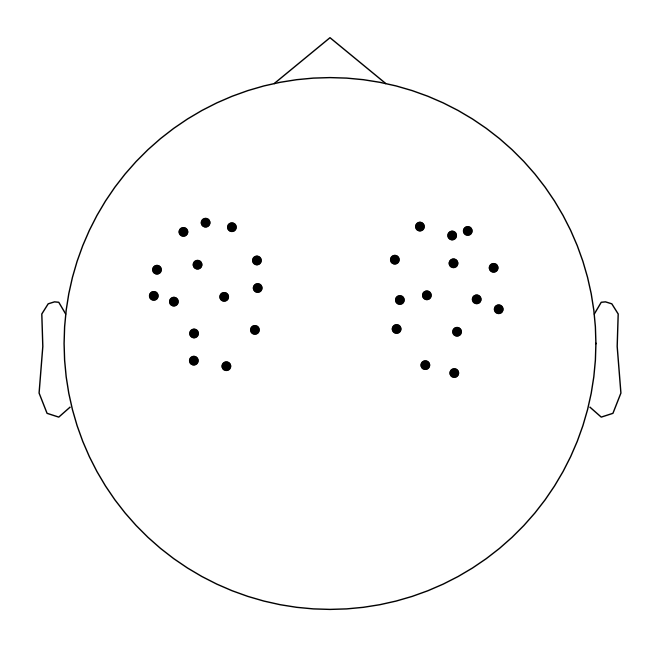

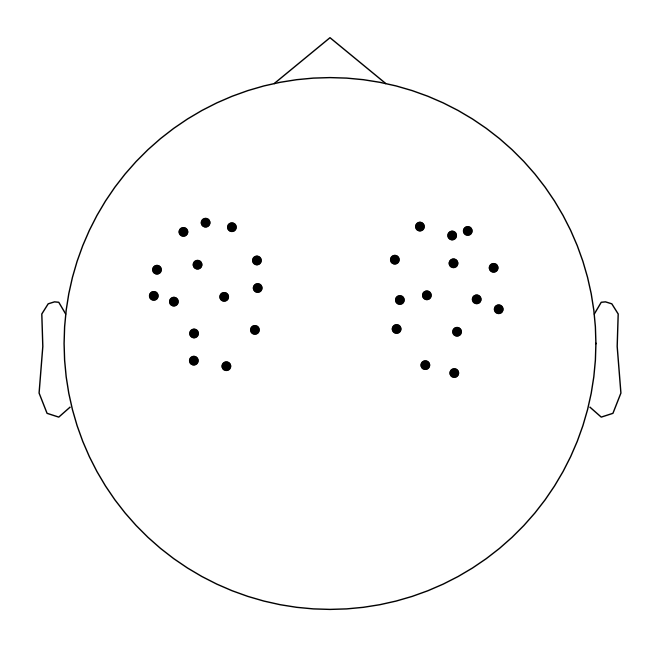

In [8]:
#View location of sensors over brain surface
raw_intensity.plot_sensors()

##### Multiple Choice Question
What are the lobes covered by this measurement ?
* 1. Temporal lobe
* 2. Occipital lobe
* 3. Prefrontal lobe 
* 4. Parietal lobe

In [ ]:
# Correct answers: Temporal and parietal lobes

Let's now have a look at the experimental design used for this measurement.

The experimental designs most commonly employed by auditory fNIRS researchers are block- and event-related designs. Event-related design refers to multiple stimuli that are assumed to occur instantaneously and have randomized time between events. In an event-related finger tapping experiment, the participant would tap a button with the finger approximately every 20 seconds. In a block design, the finger tapping would be performed continuously during a certain time interval and would be followed by a short block of rest.

In turn, the choice of the experimental design depends on a range of factors, including the statistical power of the protocol, the duration of the experiment, and whether the design provides the flexibility to study the effect of interest. While the block design might lead to higher detection power, it can also induce learning and boredom effects which may bias the results. On the other hand, event-related designs reduce the effects of learning, boredom and other events unrelated to the task while exhibiting loss in detection power. 

Run the next cell to display the sequence of events implemented in this measurement.

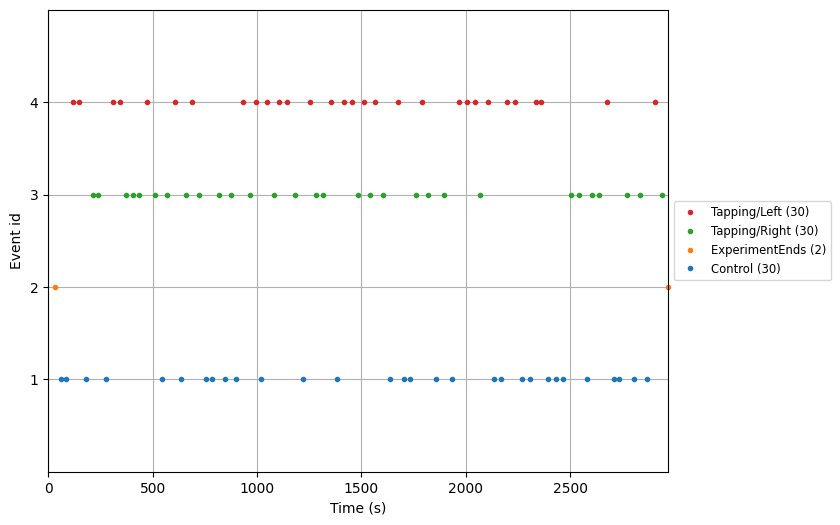

In [9]:
#Load the event annotations
events, event_dict=mne.events_from_annotations(raw_intensity,verbose=False)
#Label the events
event_dict={'Control':1,'Tapping/Left':4,'Tapping/Right':3,'ExperimentEnds':2}
#Display the sequence of events 
plt.rcParams["figure.figsize"]=(10,6)
mne.viz.plot_events(events,event_id=event_dict,sfreq=raw_intensity.info['sfreq']);

As you may observe, each individual stimulus is separated to the others by long interstimulus interval. We can thus conclude that an event-related design was used for the studied measurement.

##### Question
Roughly, what is the average interstimulus interval of this design ?

In [7]:
# Correct answer: 35 seconds

Let's now vizualise the data. Run the next cell to display data obtained with the fNIRS system. 


In [ ]:
#Create a figure window
plt.rcParams["figure.figsize"]=(40,40)
#Plot a time-series of light intensity 
raw_intensity.plot(duration=100,n_channels=len(raw_intensity.ch_names))

Using qt as 2D backend.


The near-infrared light sent by a source (labelled "S" in our system) is absorbed by the HbO and HHb with a maximal absorption observed at the wavelengths 760nm and 850nm, respectively. The amounts of light absorbed by the two molecules are then detected by a detector  (labelled "D" in our system). As a consequence, each channel provides with two time-series of concentration changes, one for the HbO and the other for the HHb. 

Data are thus initially provided in a raw format of light intensity. This can be converted using the Beer-Lambert law (see equation below), into an optical density which in turn can be translated into concentrations change of HbO and HbR, as proxies of the brain activity.

\begin{equation}
    log_{10}(\frac{I_0}{I})=\epsilon l c
    \end{equation}

With $OD_\lambda$, $I_o$, I, $\epsilon$, c and l respectively corresponding to the absorbance, the incident light intensity, the transmitted light intensity, the moral absorption coefficient (in $M^-1 cm^-1$), the molar concentration (in M) and the optical pathlength for a given wavelength $\lambda$.

But since the human tissue is a strong scattering medium for the near-infrared light, the Beer–Lambert law cannot be directly applied to biological tissue. Subsequently, a modified version of the Beer-Lambert law that takes into account the light scattering has been proposed (see equation below).

\begin{equation}
OD_\lambda= log\frac{I_o}{I}=\epsilon_\lambda lcB + OD_{R\lambda}
\end{equation}

With B and $OD_{R\lambda}$ respectively corresponding to the pathlength correction factor and the oxygen independent light losses due to scattering in the tissue. For more information on the equation, see the reference: Delpy DT, Cope M, Zee P van der, Arridge S, Wray S, Wyatt J. Estimation of optical pathlength 
through tissue from direct time of flight measurements. Phys Med Biol 1988; 33: 1433-1442.

Run the next cell to convert raw intensity into optical density.

In [8]:
#Convert raw intensity into optical density
raw_od=mne.preprocessing.nirs.optical_density(raw_intensity)

And then, run the cell below to convert optical density into concentration change.

In [9]:
#Import required beer-lambert law related function
from mne.preprocessing.nirs import beer_lambert_law
#Convert optical density into concentration change
raw_haemo=beer_lambert_law(raw_od)

Now let's check the quality of the converted data. 

As highly perfused tissues, extra-cortical compartments such as the scalp, the skin, the meninges, or the cerebrospinal fluid can absorb the near-infrared light emitted by fNIRS sensors. In turn, the signal measured with fNIRS will confound changes of HbO and HbR concentrations that are evoked by a neural activation in the cortex or by intrinsic mechanism in extra-cortical compartments. For instance, a common change observed in fNIRS signal is the intrinsic variation of cardiac rhythm occurring in extra-cortical tissues.

Despite the presence of cardiac oscilliations in the signal is undesirable, it can be used wisely. In particular, the amount of physiological noise measured in a signal has been shown to reflect the optical coupling between the measuring channel and the scalp. Subsequently, a measure of the prominence of the cardiac oscilliations has been established to assess the scalp coupling index (SCI). For more information on the metric computation, see the references:
* Pollonini L et al., “PHOEBE: a method for real time mapping of optodes-scalp coupling in functional near-infrared spectroscopy” in Biomed. Opt. Express 7, 5104-5119 (2016). 
* Hernandez, Samuel Montero, and Luca Pollonini. "NIRSplot: a tool for quality assessment of fNIRS scans." Optics and the Brain. Optical Society of America, 2020.

Run the next cell to compute the SCI and plot the result.

[Text(0.5, 0, 'Scalp Coupling Index'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

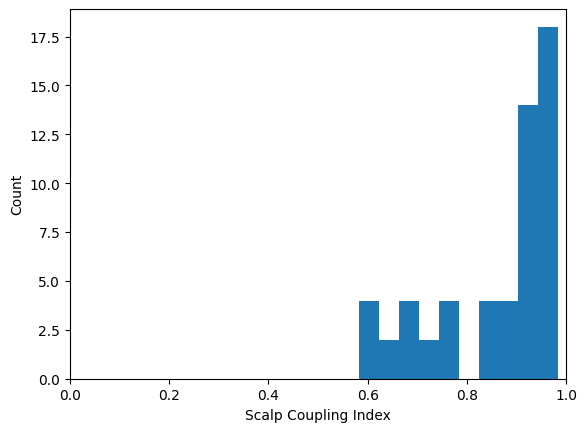

In [10]:
#Compute the SCI
sci=mne.preprocessing.nirs.scalp_coupling_index(raw_od)
#Plot the SCI
fig,ax=plt.subplots()
ax.hist(sci)
ax.set(xlabel='Scalp Coupling Index',ylabel='Count',xlim=[0, 1]) 

##### Question
What is the number of bad channels (SCI < 6) ?

In [14]:
raw_od.info['bads']

['S1_D9 760', 'S1_D9 850']

Run the next cell to mark the bad channels.

In [13]:
raw_od.info['bads'] = list(compress(raw_od.ch_names, sci < 0.6))

Let's now detect and correct the remaining component of the signal that originates from the cardiac oscillations. 

The cardiac oscilliations represent the major frequency component of the signal. 

Run the next cell to do decompose the power of the signal into its frequency components. Can you detect the frequency component corresponding to the cardiac oscillations ?  

In [ ]:
#Plot the hemoglobin concentration change
fig = raw_haemo.plot_psd(average=False)
fig.suptitle('Before filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)

The power spectrum gives a frequency peak at 1,25 Hz which would correspond to approximately 1 beat / second. You may notice that this frequency corresponds to the cardiac rhythm. 

Fortunately, the noise induced by cardiac oscillations can be removed by filtering, since the corresponding frequency band is well distinguished from that of hemodynamic responses (< 0,5Hz). 

Based on the above information, apply a low-pass filter to only retain the hemodynamic responses in your signal. You may especially need to read the documentation on filters proposed by mne library (https://mne.tools/stable/generated/mne.filter.filter_data.html).

In [ ]:
raw_haemofiltered = raw_haemo.filter(0.05, 0.7, h_trans_bandwidth=0.2,
                             l_trans_bandwidth=0.02) 

Run the next cell to plot your filtered signal.

In [ ]:
#Plot the hemoglobin concentration change
fig = raw_haemofiltered.plot_psd(average=False)
fig.suptitle('After filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)

Let's now vizualise the data. Run the next cell to display the preprocessed time-series of one channel.

In [ ]:
#Plot the time-series of one channel
plt.rcParams["figure.figsize"]=(40,40)
raw_haemofiltered.pick(picks=[0,1]).plot(duration=100,n_channels=len(raw_intensity.ch_names),scalings=dict(hb0=1e-5,hbr=1e-5))

<div class="alert alert-success">
<p><b>Congratulations for having finished this part of the laboratory! </b></p>
</div>